# Exercise 1: Breast Cancer Classification with Logistic Regression

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [34]:
# Convert to DataFrame
cancer_df = pd.DataFrame(data.data, columns=data.feature_names)
cancer_df['target'] = data.target

# Display the first few rows of the dataframe
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
# Check for missing values
print(cancer_df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [41]:
# Check for missing values
print(cancer_df.isnull().sum().sum())

0


In [37]:
# Distribution of target variable
print(cancer_df['target'].value_counts())

1    357
0    212
Name: target, dtype: int64


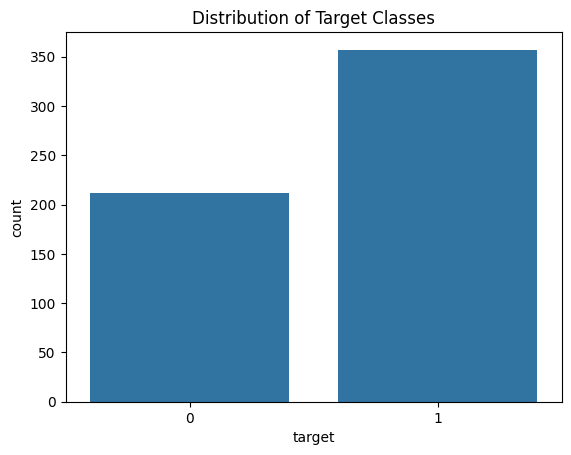

In [39]:
sns.countplot(x='target', data=cancer_df)
plt.title('Distribution of Target Classes')
plt.show()

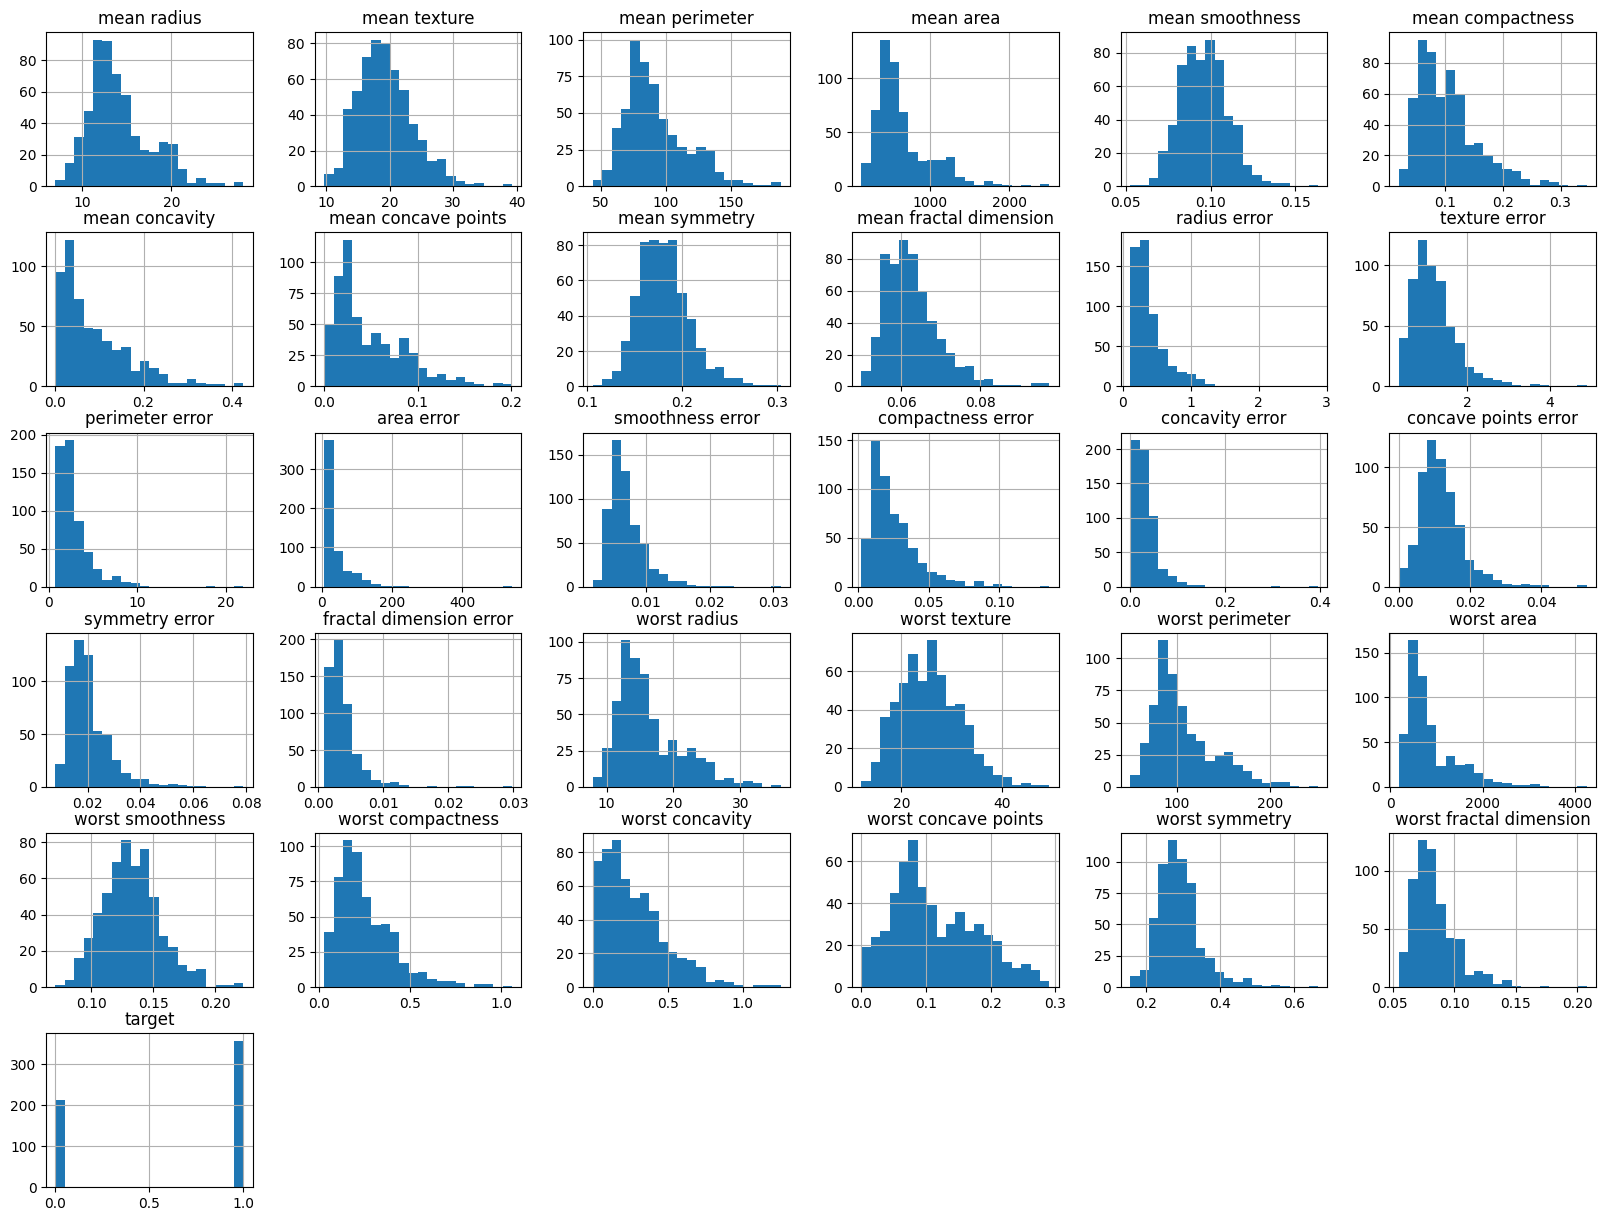

In [40]:
# Histograms for each feature
cancer_df.hist(bins=20, figsize=(20, 15))
plt.show()

In [3]:
X.shape, y.shape

((569, 30), (569,))

In [4]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
X_train.shape, y_train.shape

((398, 30), (398,))

In [6]:
X_test.shape, y_test.shape

((171, 30), (171,))

In [77]:
# define the model
model = LogisticRegression(max_iter=110)

In [78]:
# Train the classifier
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=110)

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_train)

In [80]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9397


In [81]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [82]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9708


In [83]:
# Calculate and print classification report
creport = classification_report(y_test, y_pred, target_names=data.target_names)
print(creport)

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [84]:
# Calculate and print classification report
cmatrix = confusion_matrix(y_test, y_pred)
print(cmatrix)

[[ 59   4]
 [  1 107]]
